In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
"""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
#Getting the list of classes

def get_classname_from_string(string):
    if(string.endswith(".jpg")):
        string = string[:-4]
    words = string.split()
    current_class = ''.join(map(lambda c: '' if c in '0123456789' else c, words[0]))
    current_class = current_class[:-1]
    return current_class

classes = set()
with open('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/annotations/annotations/list.txt') as annotations_list:
    for line in annotations_list:
        if line[0]!="#":
            current_class = get_classname_from_string(line)
            classes.add(current_class)


classes_dictionary = {k: v for v, k in enumerate(classes)}# classname--> int 
classnumber_to_name_dict = {v: k for k, v in classes_dictionary.items()} # int --> classname
#print(classes_dictionary)

In [3]:
print(classes_dictionary)
print(classnumber_to_name_dict)

{'japanese_chin': 0, 'staffordshire_bull_terrier': 1, 'saint_bernard': 2, 'shiba_inu': 3, 'Maine_Coon': 4, 'Birman': 5, 'boxer': 6, 'scottish_terrier': 7, 'chihuahua': 8, 'miniature_pinscher': 9, 'beagle': 10, 'english_cocker_spaniel': 11, 'Persian': 12, 'english_setter': 13, 'Russian_Blue': 14, 'Egyptian_Mau': 15, 'american_bulldog': 16, 'wheaten_terrier': 17, 'german_shorthaired': 18, 'British_Shorthair': 19, 'leonberger': 20, 'Sphynx': 21, 'Bengal': 22, 'yorkshire_terrier': 23, 'samoyed': 24, 'basset_hound': 25, 'havanese': 26, 'american_pit_bull_terrier': 27, 'pug': 28, 'Bombay': 29, 'newfoundland': 30, 'pomeranian': 31, 'great_pyrenees': 32, 'keeshond': 33, 'Ragdoll': 34, 'Abyssinian': 35, 'Siamese': 36}
{0: 'japanese_chin', 1: 'staffordshire_bull_terrier', 2: 'saint_bernard', 3: 'shiba_inu', 4: 'Maine_Coon', 5: 'Birman', 6: 'boxer', 7: 'scottish_terrier', 8: 'chihuahua', 9: 'miniature_pinscher', 10: 'beagle', 11: 'english_cocker_spaniel', 12: 'Persian', 13: 'english_setter', 14: 

In [17]:
filenames = os.listdir("/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/")

#The dataset turned out to have some images with incorrect extensions causing opencv to raise exceptions, or worse report errors without throwing an exception...
corrupted_images_list = ["Egyptian_Mau_139.jpg","Egyptian_Mau_145.jpg","Egyptian_Mau_177.jpg","Egyptian_Mau_191.jpg","Egyptian_Mau_167.jpg","Abyssinian_34.jpg","beagle_25.jpg","beagle_25.jpg","chihuahua_14.jpg","Persian_10.jpg","beagle_116.jpg","chihuahua_63.jpg","chihuahua_116.jpg"]
class_files = dict() # Dictionary classname--> file paths
for f in filenames:
    if f in corrupted_images_list:
        continue
    file_class = get_classname_from_string(f)
    if f.endswith(".mat"):
        continue
    if file_class in class_files:
        class_files[file_class].append(f)
    else:
        class_files[file_class] = [f]
#print(class_files)

In [18]:
#There are mat files in this dataset for some reason so we gotta get just the jpgs
from random import sample
import math
import shutil
TRAIN_PERCENT = 0.7
TEST_PERCENT = 1-TRAIN_PERCENT

TRAIN_X = []
TEST_X = []
TRAIN_Y = []
TEST_Y = []
#Creating test split
def create_test_split():
    for key, file_list in class_files.items():
        class_number = classes_dictionary[key]
        file_list_size = len(file_list)
        number_to_take = math.floor(file_list_size*TRAIN_PERCENT)
        train_sample = sample(file_list,number_to_take)
        test_sample = [f for f in file_list if f not in train_sample]
        TRAIN_X.extend(train_sample)
        TEST_X.extend(test_sample)
        TRAIN_Y.extend([class_number]*len(train_sample))
        TEST_Y.extend([class_number]*len(test_sample))
        """
        for f in train_sample:
            shutil.copy(os.path.join("/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/",f),os.path.join("/kaggle/working/train",key,f))
        for f in test_sample:
            shutil.copy(os.path.join("/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/",f),os.path.join("/kaggle/working/test",key,f))
        """
        #print(f"Train samples in class {f}: {len(train_sample)}. Test samples in class {f}: {len(test_sample)}")
create_test_split()

In [19]:
print(TEST_X[::60])
print(TEST_Y[::60])

['american_pit_bull_terrier_95.jpg', 'leonberger_145.jpg', 'Siamese_67.jpg', 'boxer_17.jpg', 'american_bulldog_116.jpg', 'Sphynx_132.jpg', 'Birman_126.jpg', 'english_setter_104.jpg', 'pug_32.jpg', 'yorkshire_terrier_22.jpg', 'havanese_109.jpg', 'miniature_pinscher_164.jpg', 'basset_hound_187.jpg', 'scottish_terrier_90.jpg', 'British_Shorthair_266.jpg', 'Maine_Coon_163.jpg', 'staffordshire_bull_terrier_57.jpg', 'japanese_chin_109.jpg', 'wheaten_terrier_129.jpg', 'beagle_204.jpg', 'great_pyrenees_165.jpg', 'pomeranian_118.jpg', 'german_shorthaired_68.jpg', 'Ragdoll_24.jpg', 'Russian_Blue_201.jpg']
[27, 20, 36, 6, 16, 21, 5, 13, 28, 23, 26, 9, 25, 7, 19, 4, 1, 0, 17, 10, 32, 31, 18, 34, 14]


In [20]:
#One hot encoding labels
from keras.utils import to_categorical
TRAIN_Y = np.array(TRAIN_Y)
TEST_Y = np.array(TEST_Y)
one_hot_encoded_train = to_categorical(TRAIN_Y)
one_hot_encoded_test = to_categorical(TEST_Y)


#Test
print(one_hot_encoded_train[::100])
inv = np.argmax(one_hot_encoded_test[0])
print(inv)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
27


In [22]:
#Processing images
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import cv2
images_directory = "/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/"
X_TRAIN_IMAGES = []
X_TEST_IMAGES = []

# Size of images after resizing
pixels_x = 250 
pixels_y = 250

def read_and_process_for_model(filename):
    full_filepath = os.path.join(images_directory,filename)
    img = image.load_img(full_filepath, target_size=(pixels_x, pixels_y))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def read_and_process_for_showing(filename):
    #print(filename)
    full_filepath = os.path.join(images_directory,filename)
    image_read = cv2.imread(full_filepath,cv2.IMREAD_COLOR)
    resized_image = cv2.resize(image_read,(pixels_x,pixels_y),interpolation=cv2.INTER_LINEAR)
    colors_switched = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB) 
    return colors_switched

In [23]:
for f in TRAIN_X:
    im = read_and_process_for_model(f)
    X_TRAIN_IMAGES.append(im)
for f in TEST_X:
    im = read_and_process_for_model(f)
    X_TEST_IMAGES.append(im)
X_TRAIN_IMAGES = np.array(X_TRAIN_IMAGES)
X_TEST_IMAGES = np.array(X_TEST_IMAGES)

In [24]:
del TRAIN_X
del TEST_X
del filenames
gc.collect()

11774

In [29]:
print(X_TRAIN_IMAGES.shape)
print(TRAIN_Y.shape)

print(X_TEST_IMAGES.shape)
print(TEST_Y.shape)

print(np.squeeze(X_TEST_IMAGES).shape)

(5900, 1, 250, 250, 3)
(5900,)
(1478, 1, 250, 250, 3)
(1478,)
(1478, 250, 250, 3)


In [30]:
import keras
from keras import layers
from keras import models
from keras import optimizers

In [28]:
#CNN setup
def create_model():
    baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=layers.Input(shape=(pixels_x, pixels_y, 3)))
    baseModel.trainable = False #Prevent updating the weights of the imported model
    inputs = keras.Input(shape=(pixels_x, pixels_y, 3))
    our_inputs = baseModel(inputs, training=False) #training=false makes sure the batch normalization layers work correctly (in inference mode)
    pool_1 = layers.AveragePooling2D((6,6))(our_inputs)
    flatten = layers.Flatten()(pool_1)
    dropout_1 = layers.Dropout(0.3)(flatten)
    dense_1 = layers.Dense(256, activation="relu")(dropout_1)
    dropout_2 = layers.Dropout(0.5)(dense_1)
    outputs = layers.Dense(37,activation="softmax")(dropout_2)
    return keras.Model(inputs=inputs, outputs=outputs)
my_model = create_model()
my_model.summary()

94765736/94765736 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 average_pooling2d (AverageP  (None, 1, 1, 2048)       0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544 

In [31]:
#Getting data for fitting
batch_size = 64
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   brightness_range=(0.7,1.3)
                                  )
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(np.squeeze(X_TRAIN_IMAGES),one_hot_encoded_train,batch_size=batch_size)
val_generator = val_datagen.flow(np.squeeze(X_TEST_IMAGES), one_hot_encoded_test, batch_size=batch_size)

In [32]:
#Training
from keras import callbacks

early_stopping_setting = callbacks.EarlyStopping(patience=3,start_from_epoch=3)

my_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizers.Adam(lr=0.001),metrics=[keras.metrics.CategoricalAccuracy()])
history = my_model.fit_generator(train_generator,
                             steps_per_epoch=len(TRAIN_Y) // batch_size,
                             epochs=3, #30
                             callbacks=early_stopping_setting,
                             validation_data = val_generator,
                             validation_steps = len(TEST_Y) // batch_size,
                             shuffle =True,
                             verbose = 2)

my_model.save('model_keras_with_resnet50.h5')

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/3
92/92 - 103s - loss: 2.1698 - categorical_accuracy: 0.4090 - val_loss: 0.5487 - val_categorical_accuracy: 0.8308 - 103s/epoch - 1s/step
Epoch 2/3
92/92 - 100s - loss: 1.0386 - categorical_accuracy: 0.6859 - val_loss: 0.3912 - val_categorical_accuracy: 0.8675 - 100s/epoch - 1s/step
Epoch 3/3
92/92 - 99s - loss: 0.8392 - categorical_accuracy: 0.7380 - val_loss: 0.3375 - val_categorical_accuracy: 0.8899 - 99s/epoch - 1s/step


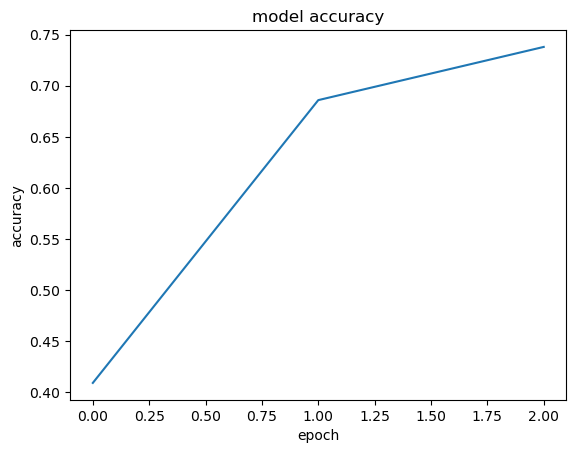

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

(1, 250, 250, 3)
0.98029906
(1, 250, 250, 3)
0.9993579
(1, 250, 250, 3)
0.9998808
(1, 250, 250, 3)
0.9604904
(1, 250, 250, 3)
0.9953263
(1, 250, 250, 3)
0.99455726
(1, 250, 250, 3)
0.9859407
(1, 250, 250, 3)
0.986387
(1, 250, 250, 3)
0.9941089
(1, 250, 250, 3)
0.9267601
(1, 250, 250, 3)
0.9996513
(1, 250, 250, 3)
0.99143326


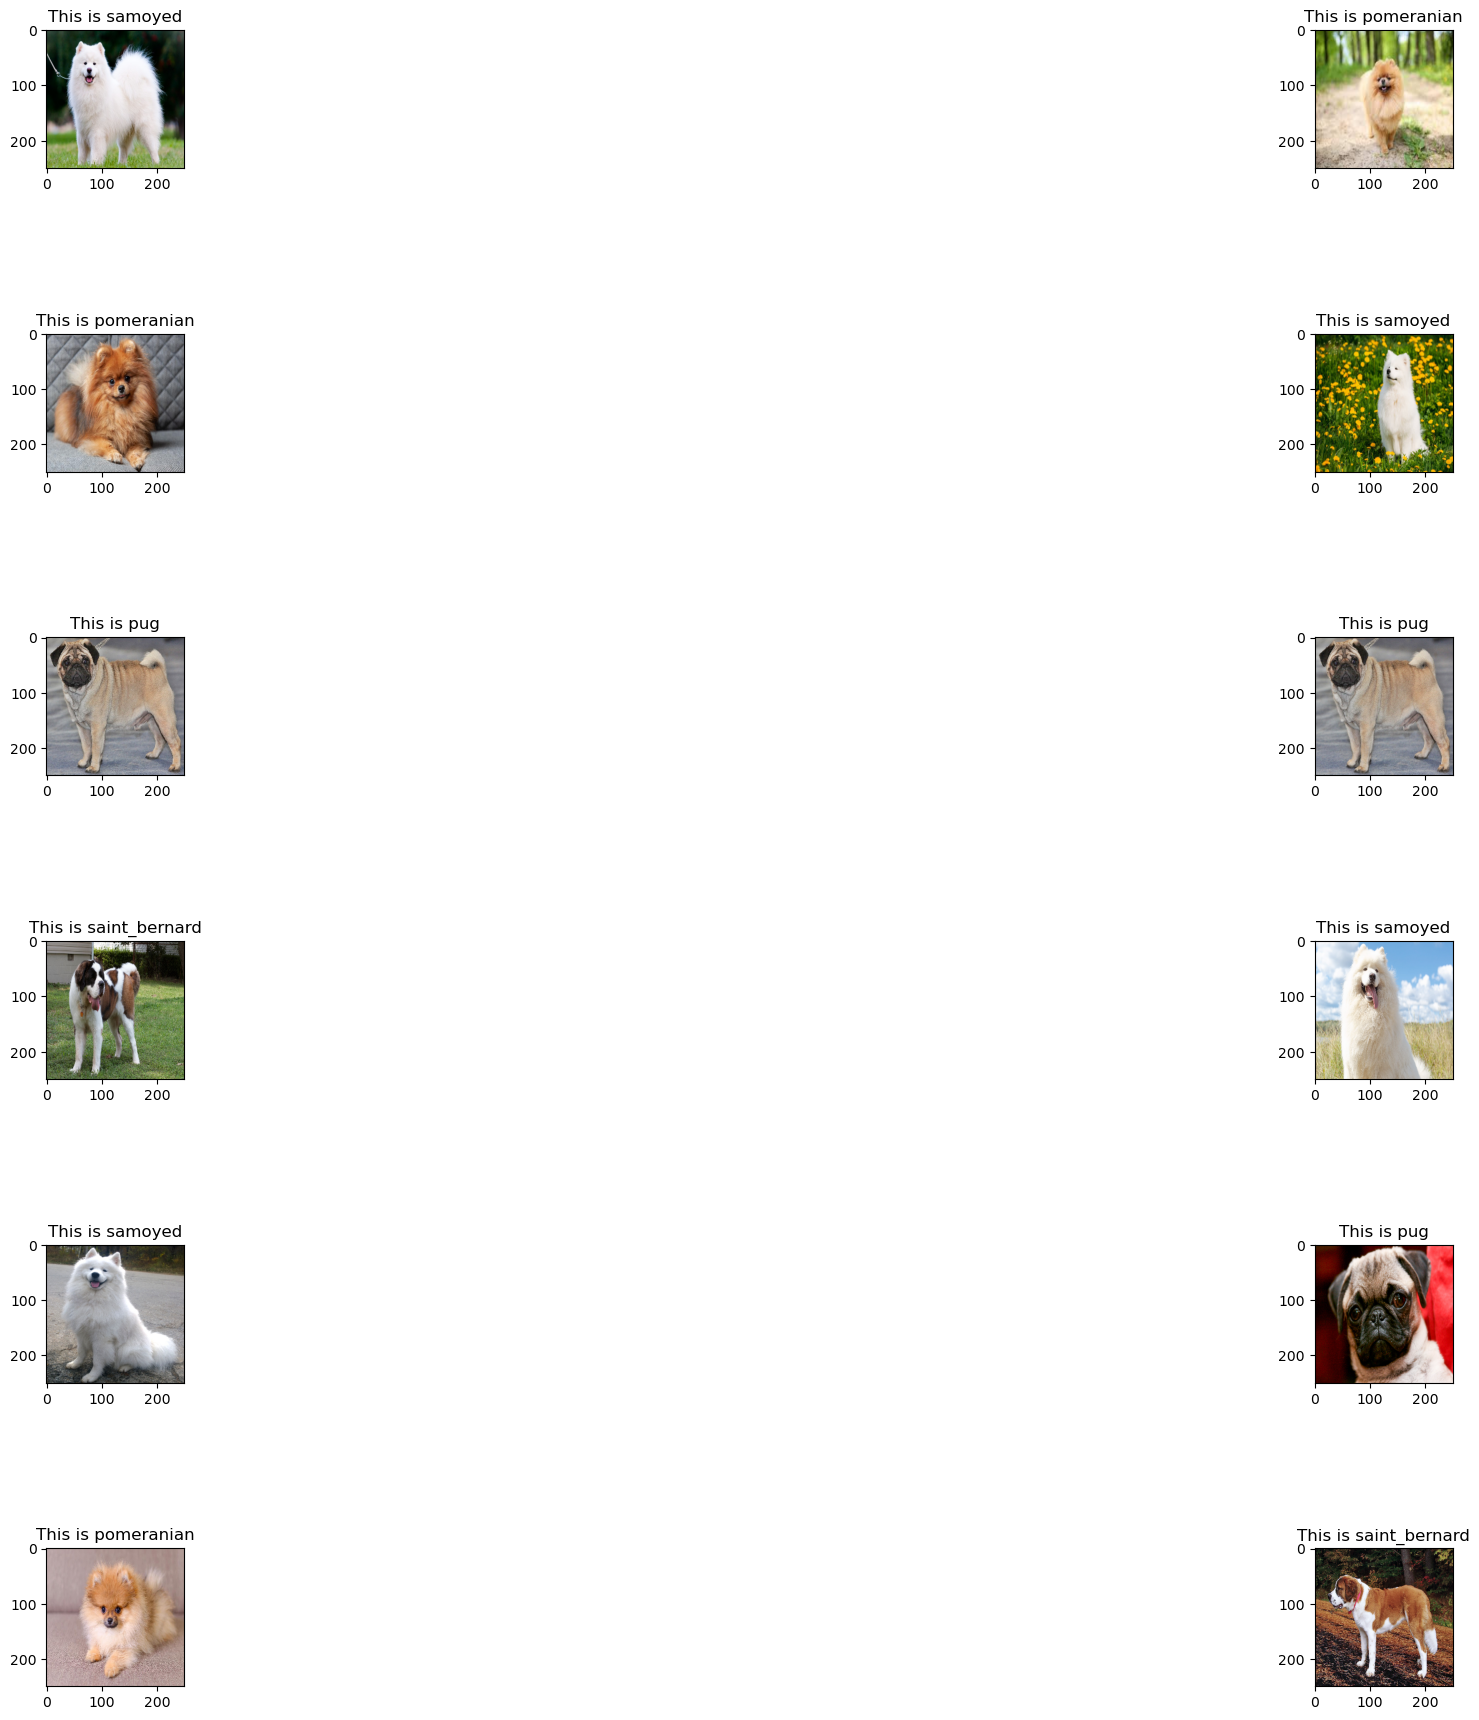

In [34]:
import matplotlib.pyplot as plt
#loaded_model = keras.models.load_model("/kaggle/input/dog-cat-classification-resnet-v2/model_keras_with_resnet50_v2.h5")
loaded_model = my_model
images_directory = "/kaggle/input/some-validation-dogs"
images_for_model = []
images_for_showing = []
filenames = os.listdir(images_directory)
for f in filenames:
    images_for_model.append(read_and_process_for_model(f))
    images_for_showing.append(read_and_process_for_showing(f))
i = 0
text_labels = []
plt.figure(figsize=(30,20))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.2)
for current_image in images_for_model:
    print(current_image.shape)
    pred = loaded_model(current_image,training=False).numpy()
    print(pred.max())
    label = classnumber_to_name_dict[np.argmax(pred)]
    text_labels.append(label)
    image_to_show =images_for_showing[i] # Opencv uses BGR instead of RGB...
    plt.subplot(7, 2,i+1)
    plt.title('This is ' + text_labels[i])
    imgplot = plt.imshow(image_to_show)
    i+=1
    if i % 12 == 0:
        break
        
plt.show()